Defining an "adopted user" as a user who has logged into the product on three separate days in at least one sevenday period , **identify which factors predict future user adoption**.

We suggest spending 12 hours on this, but you're welcome to spend more or less. Please send us a brief writeup of your findings (the more concise, the better no more than one page), along with any summary tables, graphs, code, or queries that can help us understand your approach. Please note any factors you considered or investigation you did, even if they did not pan out. Feel free to identify any further research or data you think would be valuable.

In [1]:
# Packages for working with data
import pandas as pd

# Tools for visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.5)

# Tools for model building
from sklearn.ensemble import RandomForestClassifier

In [2]:
# Load the datasets
user_data = pd.read_csv('takehome_users.csv', encoding='mbcs', index_col='object_id',
                        parse_dates=['creation_time'], infer_datetime_format=True)
engagement_data = pd.read_csv('takehome_user_engagement.csv', encoding='mbcs', index_col='time_stamp',
                              parse_dates=True, infer_datetime_format=True)

In [3]:
# Display information on users dataset
user_data.info()
user_data.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 1 to 12000
Data columns (total 9 columns):
creation_time                 12000 non-null datetime64[ns]
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null object
last_session_creation_time    8823 non-null float64
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            6417 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(3), object(3)
memory usage: 937.5+ KB


,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
object_id,,,,,,,,,
1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0
6,2013-12-17 03:37:06,Cunha Eduardo,EduardoPereiraCunha@yahoo.com,GUEST_INVITE,1.387424e+09,0,0,197,11241.0
7,2012-12-16 13:24:32,Sewell Tyler,TylerSewell@jourrapide.com,SIGNUP,1.356010e+09,0,1,37,NaN
8,2013-07-31 05:34:02,Hamilton Danielle,DanielleHamilton@yahoo.com,PERSONAL_PROJECTS,NaN,1,1,74,NaN
9,2013-11-05 04:04:24,Amsel Paul,PaulAmsel@hotmail.com,PERSONAL_PROJECTS,NaN,0,0,302,NaN


In [4]:
# Display statistics on numeric columns in the user dataset
user_data.describe()

,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
count,8.823000e+03,12000.000000,12000.000000,12000.000000,6417.000000
mean,1.379279e+09,0.249500,0.149333,141.884583,5962.957145
std,1.953116e+07,0.432742,0.356432,124.056723,3383.761968
min,1.338452e+09,0.000000,0.000000,0.000000,3.000000
25%,1.363195e+09,0.000000,0.000000,29.000000,3058.000000
50%,1.382888e+09,0.000000,0.000000,108.000000,5954.000000
75%,1.398443e+09,0.000000,0.000000,238.250000,8817.000000
max,1.402067e+09,1.000000,1.000000,416.000000,11999.000000


In [5]:
# Display general information on the user engagement dataset
engagement_data.info()
engagement_data.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 207917 entries, 2014-04-22 03:53:30 to 2014-01-26 08:57:12
Data columns (total 2 columns):
user_id    207917 non-null int64
visited    207917 non-null int64
dtypes: int64(2)
memory usage: 4.8 MB


,user_id,visited
time_stamp,,
2014-04-22 03:53:30,1,1
2013-11-15 03:45:04,2,1
2013-11-29 03:45:04,2,1
2013-12-09 03:45:04,2,1
2013-12-25 03:45:04,2,1


In [6]:
# Display statistics to get a better idea of user engagement dataset
engagement_data.describe()

,user_id,visited
count,207917.000000,207917.0
mean,5913.314197,1.0
std,3394.941674,0.0
min,1.000000,1.0
25%,3087.000000,1.0
50%,5682.000000,1.0
75%,8944.000000,1.0
max,12000.000000,1.0


There are a few details to unpack before I start working with the data. First, in the user_data dataset, we have several columns that should be formatted in order to yield information valuable for predictions. The following steps will be taken in this dataset:

1. The name of the user is not likely to be useful to us for prediction (at the moment), so it will be dropped.
2. For emails it may be useful to know which domain each user is using. This information could be useful because maybe certain domain services are classifying email from the service as spam, or the interface layout may positively impact visibility for emails. The domain name will be extracted and turned into a categorical value.
3. creation_source should be formatted as categorical values.
4. last_session_creation_time should be converted from seconds to datetime format.
    a. This column is missing values and so more effort will be placed here later on.
5. org_id should also be converted into categorical format.
6. invited_by_user_id can be converted into a boolean value (indicated whether a user has been invited by another user (1) or not (0).
    a. The missing values in this column will be converted to 0's

In [7]:
# Drop user name column
user_data.drop('name', axis=1, inplace=True)
print('---Names Dropped!---')

---Names Dropped!---


In [8]:
# Extract domain name only for email column
user_data.email = user_data.email.str.split('@', expand=True).loc[:, 1]

# Only keep domains that are used more than 2 times (removing outliers) and replace with 'other'
main_domains = list(user_data.email.value_counts()[user_data.email.value_counts() > 2].index)
user_data.email = user_data.email.map(lambda x: x if x in main_domains else 'other')
print('---Email Domains Extracted!---')

---Email Domains Extracted!---


In [9]:
# Format creation_source column as categorical values
user_data.creation_source = user_data.creation_source.astype('category')
print('---Creation Source Categories Created!---')

---Creation Source Categories Created!---


In [10]:
# Format last_session_creation_time as datetime object
user_data.last_session_creation_time = pd.to_datetime(user_data.last_session_creation_time, unit='s')
print('---Last Session Datetime Objects Formatted!---')

---Last Session Datetime Objects Formatted!---


In [11]:
# Convert org_id column to categorical format
user_data.org_id = user_data.org_id.astype('category')
print('---Organization ID Categories Created!---')

---Organization ID Categories Created!---


In [12]:
# Convert invited_by_user_id to boolean column
user_data.invited_by_user_id = user_data.invited_by_user_id.map(lambda x: 1 if x > 0 else 0)
print('---User Invitations Converted to Boolean Values!---')

---User Invitations Converted to Boolean Values!---


Now we can check in the data information to make sure everything is going as expected.

In [13]:
user_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 1 to 12000
Data columns (total 8 columns):
creation_time                 12000 non-null datetime64[ns]
email                         12000 non-null object
creation_source               12000 non-null category
last_session_creation_time    8823 non-null datetime64[ns]
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null category
invited_by_user_id            12000 non-null int64
dtypes: category(2), datetime64[ns](2), int64(3), object(1)
memory usage: 714.9+ KB


The table shown below shows that last_session_creation_time is the only column left with missing values.

These must be dealt with care, since some missing entries may be erroneous. It is possible to pull the last entry in the engagement_data dataset and replace the last_session_creation_time with the datetime stamp from this table.

If values are still missing after applying this process, the remaining timestamps can be set to the creation_time column values.

In [14]:
# Check how many users are represented in engagement_data
total_logins = engagement_data.user_id.value_counts()

print('Number of users with logins in engagement_data: {0}'.format(total_logins.shape[0]))

Number of users with logins in engagement_data: 8823


It looks like the same 8,823 users are also the only ones represented in engagement_data, which makes it likely that the original data is correct. In this case, we will set the null values to be the account creation time for the respective users.

In [15]:
# Fill in missing values for last session time
user_data.last_session_creation_time = [user_data.last_session_creation_time[i] if i in sorted(total_logins.index) else user_data.creation_time[i] for i in user_data.index]

Lastly I will create a column indicating whether or not each user has logged into the product on three separate days in at least one seven day period (i.e. an "adopted user")

In [16]:
# reform dataframe to show daily logins for users with 3 or more total logins
outlier_users = sorted(engagement_data.user_id.value_counts()[engagement_data.user_id.value_counts() <3].index)
daily_logins = engagement_data.groupby('user_id').resample('D').visited.sum()

In [17]:
# Drop outlier users from daily_logins list
daily_logins.drop(labels=outlier_users, inplace=True)

In [18]:
# Unstack the data so that columns are users and rows are days with 1 for login in that day
daily_logins = daily_logins.unstack(level=0)

In [19]:
# Create an empty set to story user_ids with more than 3 logins in any rolling 7 day period
adopted_users = set()
for i in range(7,daily_logins.shape[0]):
    user_logins = daily_logins[i-7:i].sum(axis=0)
    adopted_users.update(user_logins[user_logins > 3].index)

# Create a list indicating whether each user was adopted or not
adopted_user_list = [1 if i in adopted_users else 0 for i in user_data.index]

# Add column to user_data
user_data['adopted_user'] = adopted_user_list

Next I will finalize processing of the data for input into a model.

In [20]:
user_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 1 to 12000
Data columns (total 9 columns):
creation_time                 12000 non-null datetime64[ns]
email                         12000 non-null object
creation_source               12000 non-null category
last_session_creation_time    12000 non-null datetime64[ns]
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null category
invited_by_user_id            12000 non-null int64
adopted_user                  12000 non-null int64
dtypes: category(2), datetime64[ns](2), int64(4), object(1)
memory usage: 1.1+ MB


In [21]:
# Format categorical variables as One-hot-encoded format
X_temp = user_data.drop(['creation_time', 'last_session_creation_time', 'adopted_user'], axis=1)
X = pd.get_dummies(X_temp, columns=['email', 'creation_source', 'org_id'], drop_first=True)
y = user_data.adopted_user

Now the data is ready for modeling, with the adopted_user column serving as our target variable. Random forest will be used for the predictions here.

In [22]:
# Set up random forest
rf_clf = RandomForestClassifier(n_estimators=200, oob_score=True, n_jobs=-1,
                                random_state=42, verbose=1, class_weight='balanced')

# fit the model to the data
rf_clf.fit(X, y)
print('Out-of-bag generalization accuracy estimate: {0:.2f} %'.format(rf_clf.oob_score_))

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   10.0s finished


Out-of-bag generalization accuracy estimate: 0.82 %


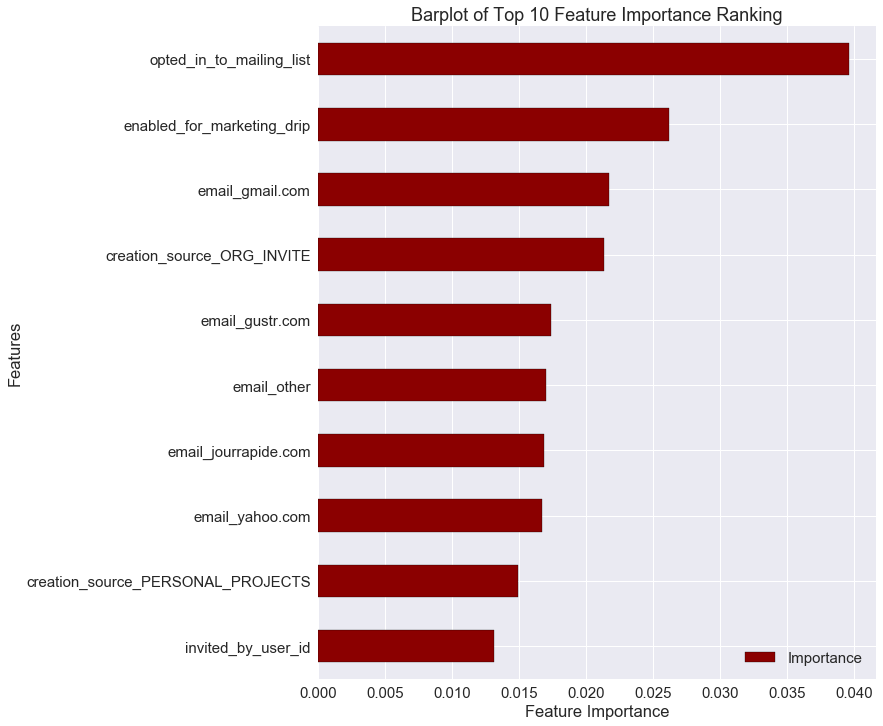

In [23]:
# Plot feature importances for random forest
features = X.columns.values

importance_df = pd.DataFrame(
    data = {'features': features,
            'Importance': rf_clf.feature_importances_
           }
).sort_values(by='Importance',
              ascending=True)

# Set the index for the importance dataframe
importance_df.set_index('features', inplace=True)

# Generate horizontal bar plot
importance_df[-10:].plot(kind='barh', figsize=(10, 12), facecolor='DarkRed', edgecolor='k')

# Plot formatting
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Barplot of Top 10 Feature Importance Ranking')

plt.show()

# Findings

Based on the analysis of the data, the most important factors relating to whether or not users will adopt are shown in the barplot above. The most important feature, by far, is whether the user was on the mailing list for the company, followed by whether they were recieving the marketing drip. Based on these factors, it would be advantageous to offer incentives that get more users onto the mailing lists. 

Email domain platform also plays a large role, and it may be worth the time to test emails on each platform to check for formatting that matches the intended emails sent, as well as spam filtering and how the email inboxes are laid out.

The reason for account creation was also rated highly, for organization invites and personal projects being of particular performance. It may be worth taking a closer look at how each category of these users utilize the service and perhaps offer incentives to bring up usage where performance is poor.

Lastly, whether or not users were invited by other users was a factor of relatively high importance. In this case, it can be useful to incentivize users to invite others.